In [206]:
import cv2
# to install cv2 use: pip install opencv-python
import math
import matplotlib.pyplot as plt 
import numpy as np

In [207]:
# correlate
def correlate (kernel, image):
    W = image.shape[0]
    H = image.shape[1]
    out =np.zeros((W,H))
    a = kernel.shape[0]%2
    b = kernel.shape[1]%2
    #print (a,b)
    for y in range(b,H-b): 
        for x in range(a,W-a): 
            for s in range (-a,a+1):
                for t in range (-b, b+1):
                    out[x,y] += (kernel[s,t]*image[x+s,y+t])
    return out

def rescale (image):
    image = np.absolute(image)
    mymin=np.amin(image)
    mymax=np.amax(image)
    W = image.shape[0]
    H = image.shape[1]
    for y in range(H): 
        for x in range(W): 
            image[x,y] = (image[x,y]-mymin)*256/(mymax-mymin)
    return image

# Skeleton

(800, 500)


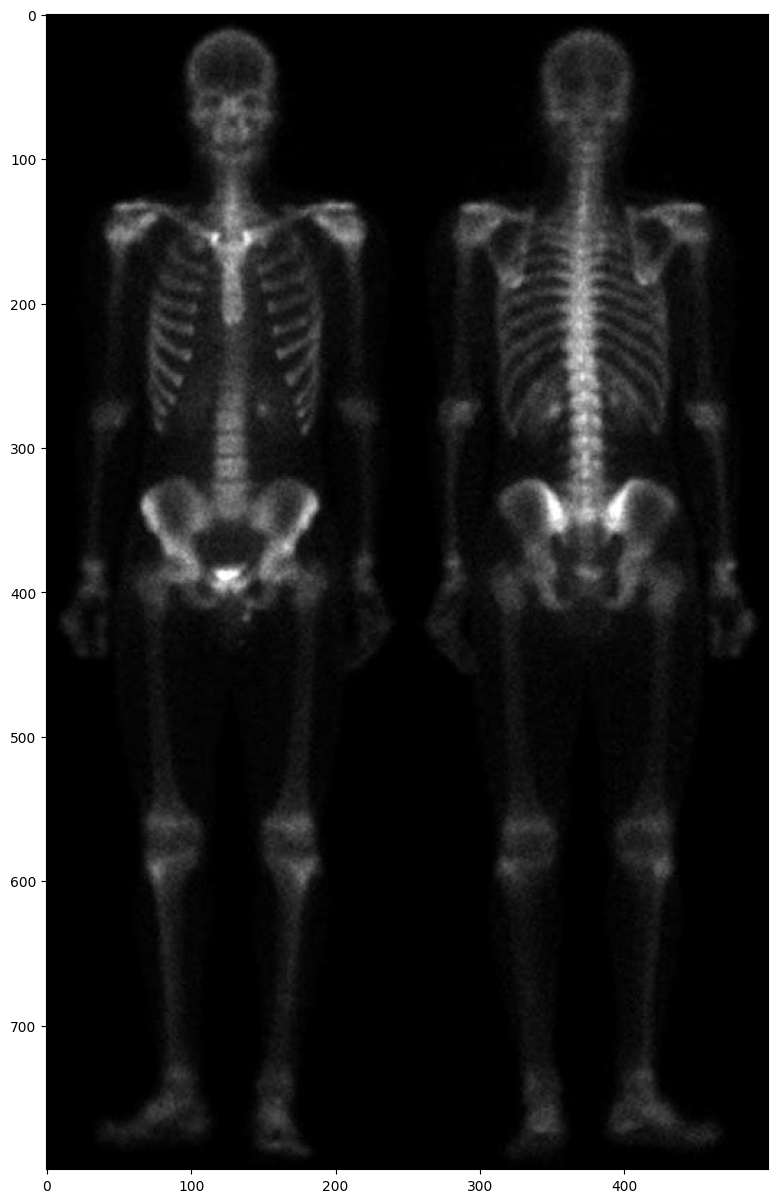

In [208]:
fname = 'Images/skeleton.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
print(img.shape)
fig = plt.figure(figsize=(25,15))
plt.imshow(img, cmap='gray')

In [209]:
orgimg = img

"""
dImg = cv2.fastNlMeansDenoising(img,None,15,27,51)
Denoisedimg = cv2.fastNlMeansDenoising(img,None,9,3,51)


Sobel_y = np.array([[-1,0,1], [-2, 0, 2],[-1,0,1]], dtype=float)
Sobel_x = np.array([[-1,-2,-1], [0, 0, 0],[1,2,1]], dtype=float)


gx = correlate(Sobel_x, Denoisedimg)
gx = np.absolute(gx)
gy = correlate(Sobel_y, Denoisedimg)
gy = np.absolute(gy)


grad = np.sqrt(np.square(gx) + np.square(gy))

img = grad+ Denoisedimg
"""

clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8, 8))

equal2 = clahe.apply(img)
equal = cv2.equalizeHist(img)
Denoisedimg = cv2.fastNlMeansDenoising(img,None,9,3,51)


Sobel_y = np.array([[-1,0,1], [-2, 0, 2],[-1,0,1]], dtype=float)
Sobel_x = np.array([[-1,-2,-1], [0, 0, 0],[1,2,1]], dtype=float)


gx = correlate(Sobel_x, img)
gx = np.absolute(gx)
gy = correlate(Sobel_y, img)
gy = np.absolute(gy)

outlines = np.sqrt(np.square(gx) + np.square(gy))





In [210]:
imgP = 0.33*Denoisedimg + 0.33*equal + 0.33* outlines
outimg  = 0.25*Denoisedimg + 0.25*equal + 0.50* outlines
Dimg = 0.5*Denoisedimg + 0.25*equal + 0.25* outlines
equalimg = 0.25*Denoisedimg + 0.50*equal + 0.25* outlines

Dimg2 = 0.7*Denoisedimg + 0.15*equal + 0.15* outlines
equalimg2 = 0.15*Denoisedimg + 0.7*equal + 0.15* outlines



img2 = 0.33*Denoisedimg + 0.33*equal2 + 0.33* outlines
outimg2  = 0.25*Denoisedimg + 0.25*equal2 + 0.50* outlines
Dimg2 = 0.5*Denoisedimg + 0.25*equal2 + 0.25* outlines
equal2img2 = 0.25*Denoisedimg + 0.50*equal2 + 0.25* outlines

Dimg22 = 0.7*Denoisedimg + 0.15*equal2 + 0.15* outlines
equal2img22 = 0.15*Denoisedimg + 0.7*equal2 + 0.15* outlines


In [211]:
print("Image type:", img.dtype)
print("Image range:", np.min(img), np.max(img))

Image type: uint8
Image range: 0 255


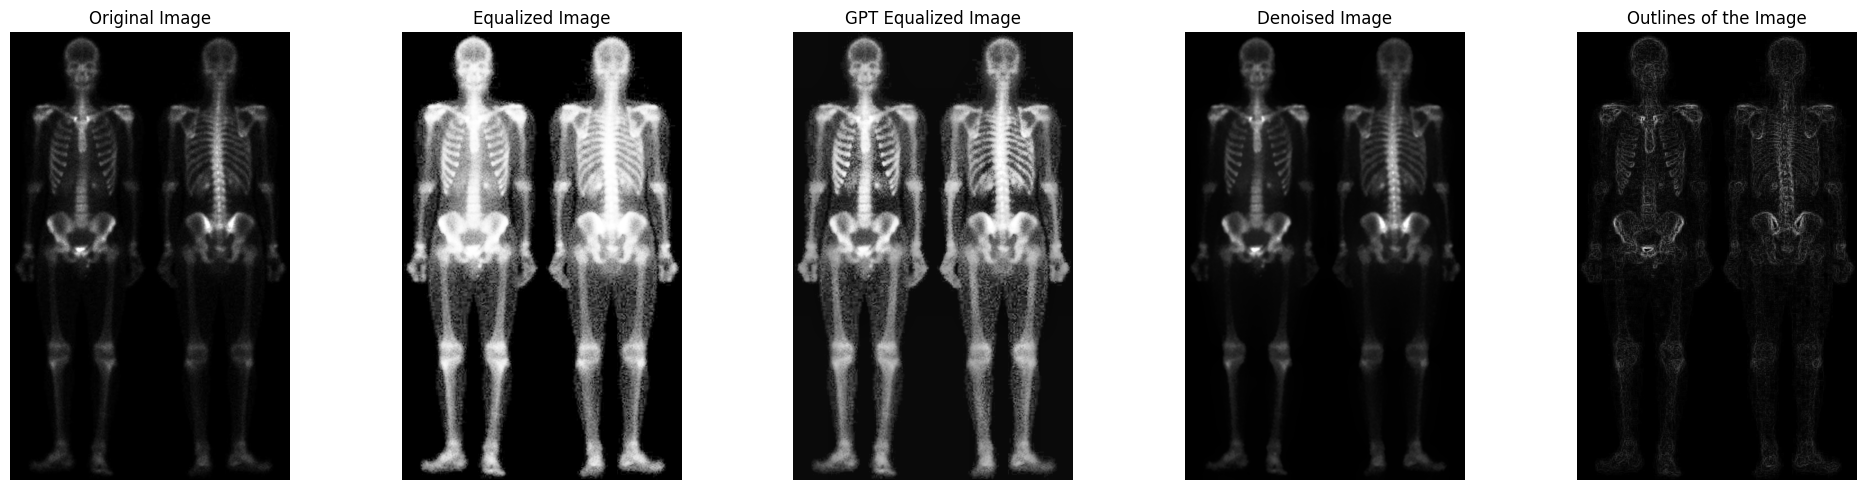

In [212]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Plot each image with its title
images = [orgimg, equal, equal2, Denoisedimg, outlines]
titles = ['Original Image', 'Equalized Image', 'GPT Equalized Image', 'Denoised Image', 'Outlines of the Image']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

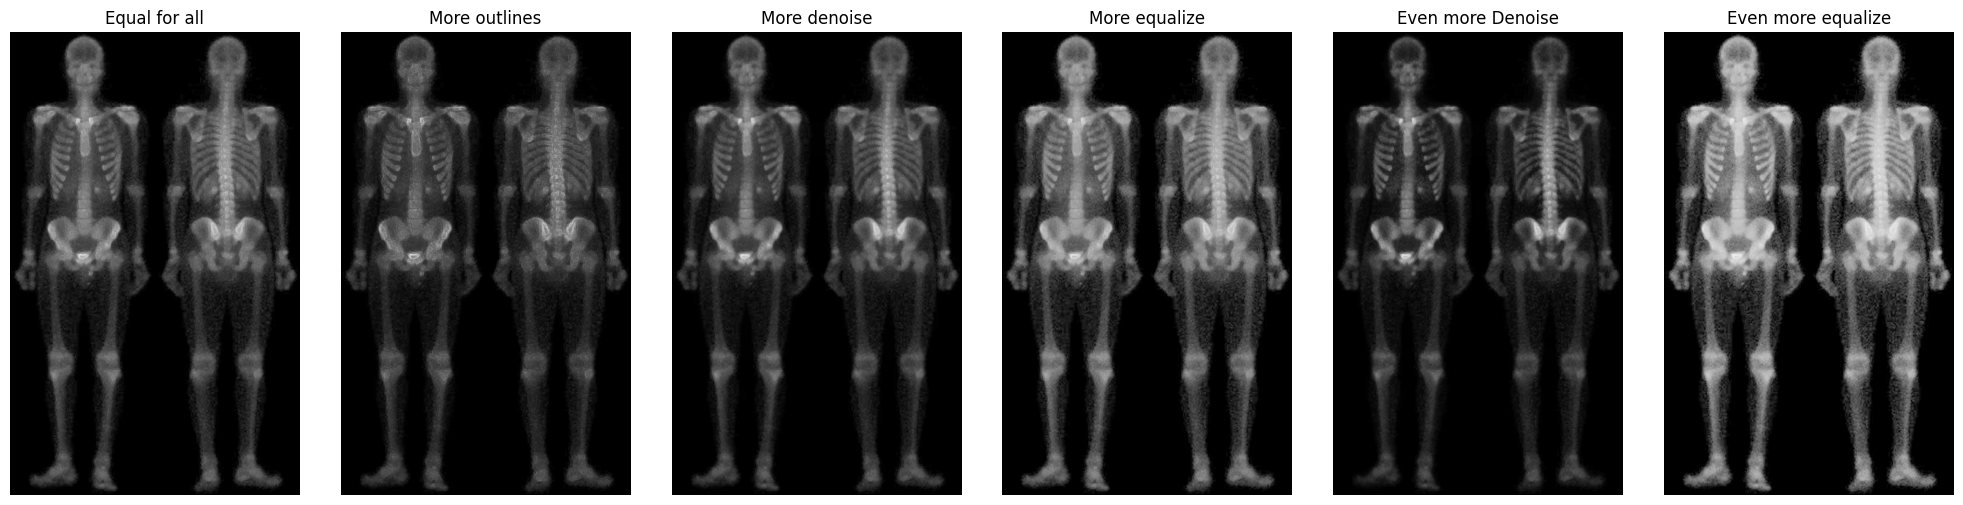

In [213]:
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

# Plot each image with its title
images = [imgP, outimg, Dimg, equalimg, Dimg2, equalimg2]
titles = ['Equal for all', 'More outlines', 'More denoise', 'More equalize', 'Even more Denoise', 'Even more equalize']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

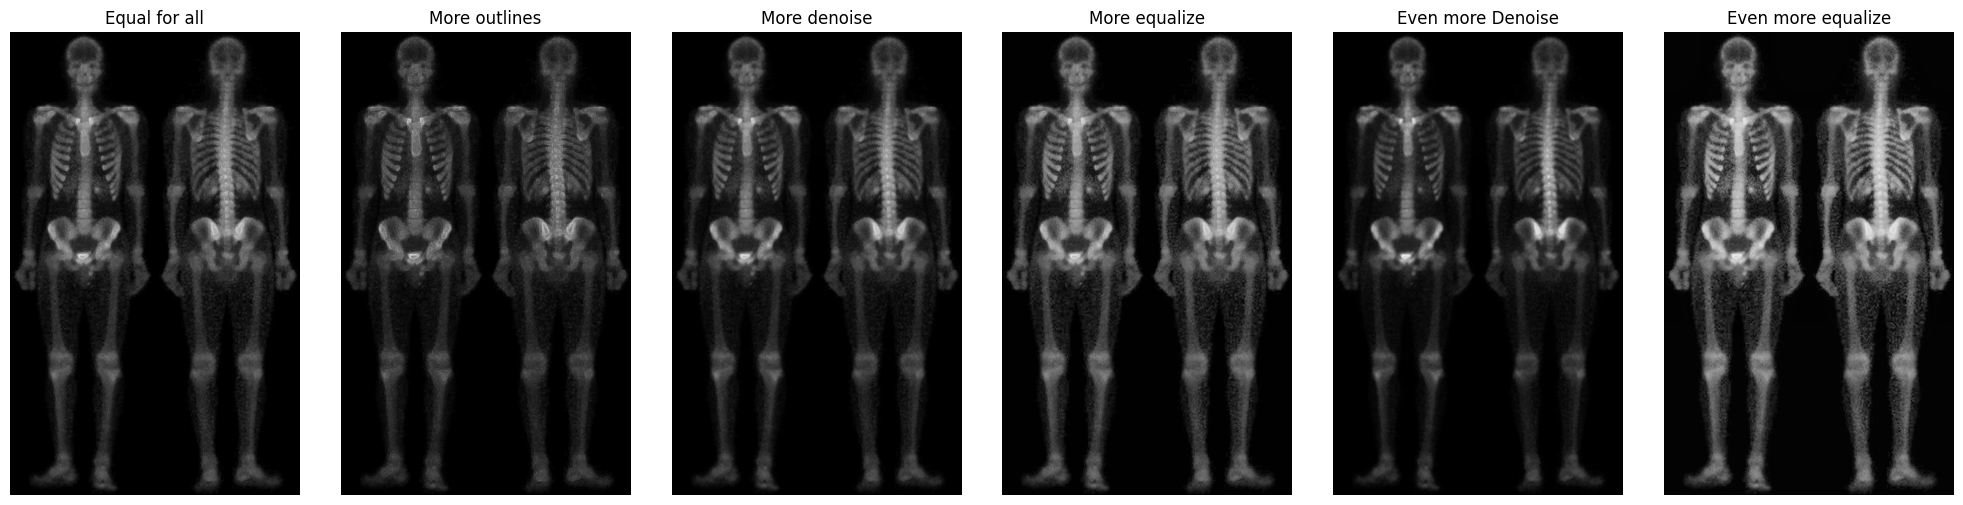

In [214]:
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

# Plot each image with its title
images = [img2, outimg2, Dimg2, equal2img2, Dimg22, equal2img22]
titles = ['Equal for all', 'More outlines', 'More denoise', 'More equalize', 'Even more Denoise', 'Even more equalize']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [215]:
# Noisy Number Plate

(384, 512)


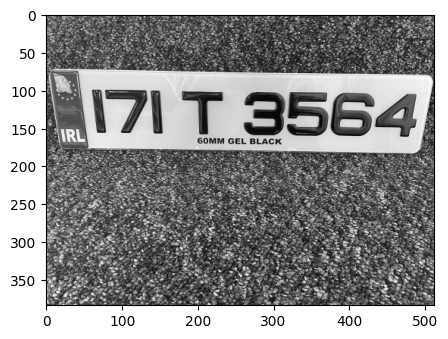

In [216]:
fname = 'Images/NumberPlate-gray.png'
matriculaog = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
print(matriculaog.shape)
fig = plt.figure(figsize=(5,5))
plt.imshow(matriculaog, cmap='gray')


In [217]:
m=9
matriculamod = cv2.medianBlur(matriculaog,m,0)


Sobel_y = np.array([[-1, 0, 1],
                    [-3, 0, 3],
                    [-1, 0, 1]], dtype=float)


Sobel_x = np.array([[-1,-3,-1],
                    [0, 0, 0],
                    [1, 3, 1]], dtype=float)



gx = correlate(Sobel_x, matriculamod)
gx = np.absolute(gx)
gy = correlate(Sobel_y, matriculamod)
gy = np.absolute(gy)

newmatricula = np.sqrt(np.square(gx) + np.square(gy))

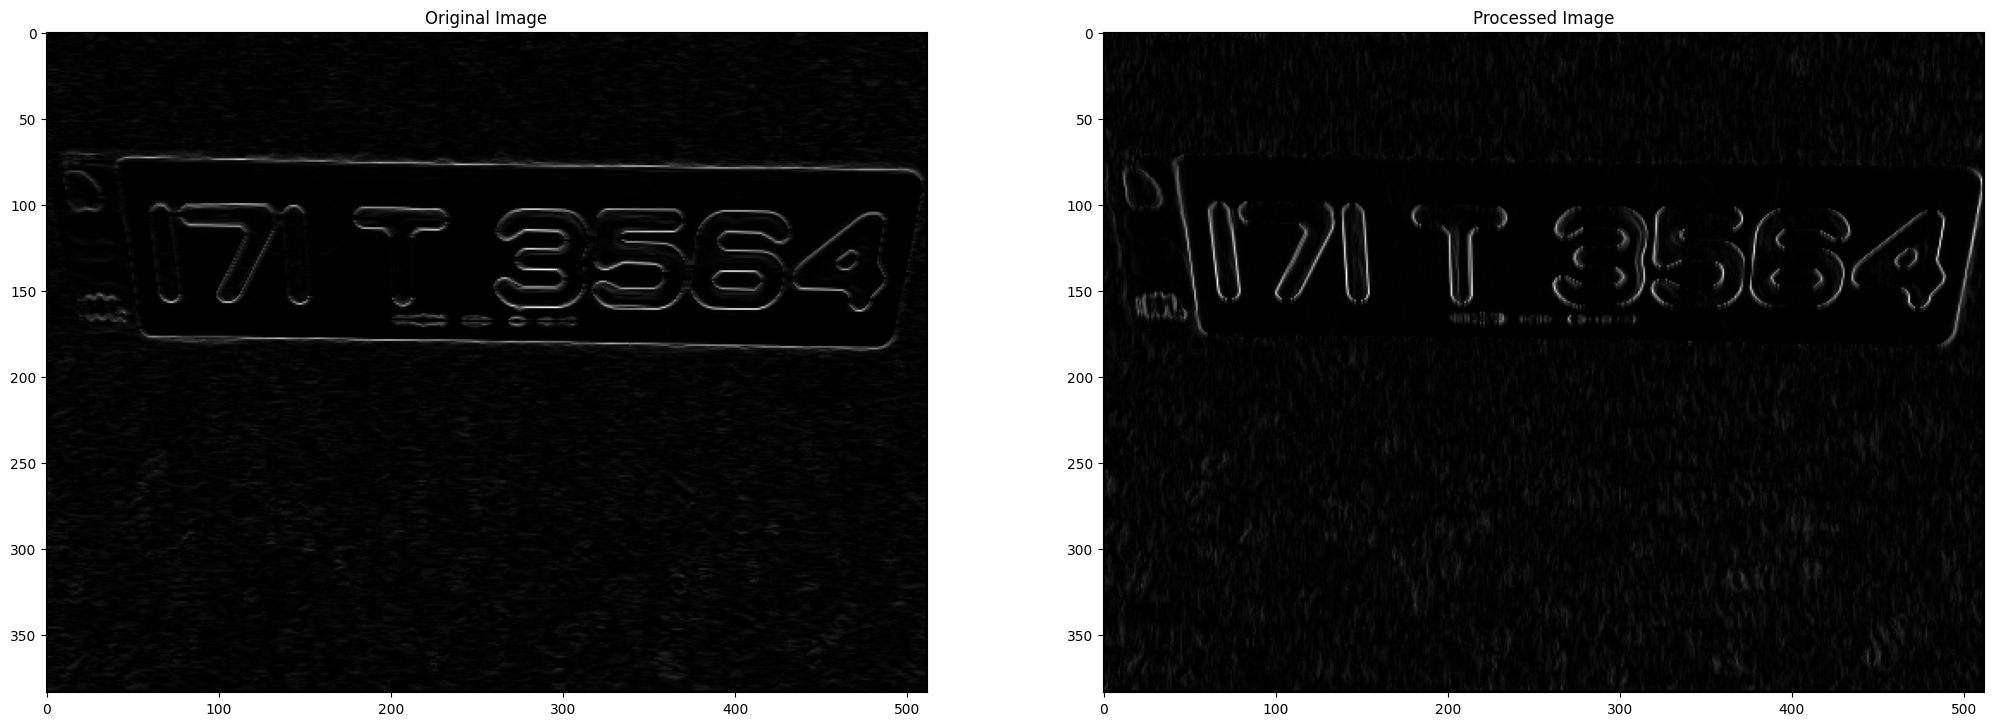

In [218]:
fig, axes = plt.subplots(1, 2, figsize=(25, 15))

# Display orgimg on the left subplot
axes[0].imshow(gx, cmap='gray')
axes[0].set_title('Original Image')

# Display img on the right subplot
axes[1].imshow(gy, cmap='gray')
axes[1].set_title('Processed Image')

plt.show()

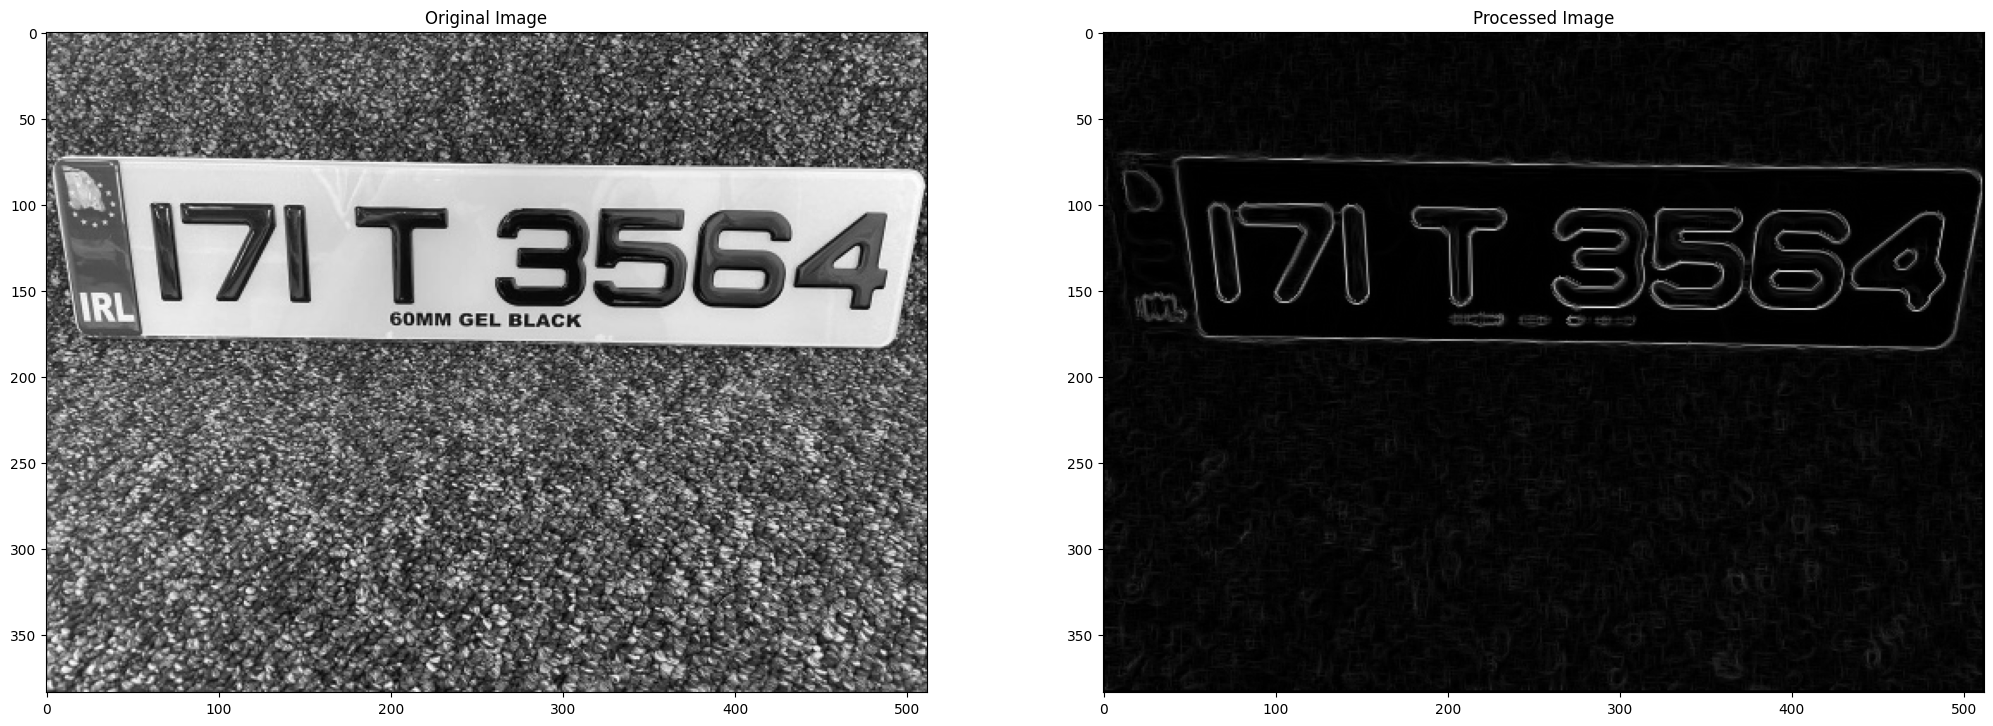

In [219]:
#print("matriculaog shape:", matriculaog.shape)
#print("newmatricula shape:", newmatricula.shape)
fig, axes = plt.subplots(1, 2, figsize=(25, 15))

# Display orgimg on the left subplot
axes[0].imshow(matriculaog, cmap='gray')
axes[0].set_title('Original Image')

# Display img on the right subplot
axes[1].imshow(newmatricula, cmap='gray')
axes[1].set_title('Processed Image')

plt.show()